MRINAL KADAM USC ID: 3135945534

In [1]:
# Import all required packages and libraries

import pandas as pd 
import numpy as np

import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_fscore_support as score, accuracy_score
from sklearn.metrics import roc_curve, auc

from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.neighbors import KNeighborsClassifier

from collections import Counter

import random

import warnings

# 1. Supervised, Semi-Supervised, and Unsupervised Learning

# (a) Download the Breast Cancer Wisconsin (Diagnostic) Data Set from: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29. Download the data in https://archive.ics.uci.edu/ml/machinelearning-databases/breast-cancer-wisconsin/wdbc.data, which has IDs, classes (Benign=B, Malignant=M), and 30 attributes. This data has two output classes.

In [2]:
# Read the input file into a dataframe

df = pd.read_csv("../data/wdbc.data",header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
# Asssign column names

df.rename({'0':'ID number','1':'Diagnosis'},axis=1,inplace=True)
df.columns = ['ID number', 'Diagnosis'] + ['fea'+str(i) for i in range(1,31)]
df

,ID number,Diagnosis,fea1,fea2,fea3,fea4,fea5,fea6,fea7,fea8,...,fea21,fea22,fea23,fea24,fea25,fea26,fea27,fea28,fea29,fea30
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
# Shift the target column to the end of the dataframe

cols_at_end = ['Diagnosis']
df = df[[c for c in df if c not in cols_at_end] 
        + [c for c in cols_at_end if c in df]]
df

,ID number,fea1,fea2,fea3,fea4,fea5,fea6,fea7,fea8,fea9,...,fea22,fea23,fea24,fea25,fea26,fea27,fea28,fea29,fea30,Diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,M
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,M
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,M
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,M
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,M
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,M
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,M
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,M


# (b) Monte-Carlo Simulation: Repeat the following procedures for supervised, unsupervised, and semi-supervised learning M = 30 times, and use randomly selected train and test data (make sure you use 20% of both the positve and negative classes as the test set). Then compare the average scores (accuracy, precision,recall, F1-score, and AUC) that you obtain from each algorithm.

In [5]:
# Split the dataframe into x and y

x = df.iloc[:,:31]
y = df.iloc[:,-1].to_frame(name='Diagnosis')

In [6]:
x

,ID number,fea1,fea2,fea3,fea4,fea5,fea6,fea7,fea8,fea9,...,fea21,fea22,fea23,fea24,fea25,fea26,fea27,fea28,fea29,fea30
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [7]:
y

,Diagnosis
0,M
1,M
2,M
3,M
4,M
...,...
564,M
565,M
566,M
567,M


In [8]:
# Function to split the dataframe according to mentioned specifications 

def train_test_split_by_class_and_ratio(df, test_size, random_state, pos_class, neg_class):   
    
    if random_state:
        df = df.sample(frac = 1,random_state=random_state)
    
    pos_class_len = len(df[df['Diagnosis'] == pos_class])
    neg_class_len = len(df[df['Diagnosis'] == neg_class])
    pos_test_set_len = round(pos_class_len * test_size)
    neg_test_set_len = round(neg_class_len * test_size)
    
    x_test_B = df[df['Diagnosis'] == pos_class].iloc[:pos_test_set_len,:31].reset_index()
    x_test_M = df[df['Diagnosis'] == neg_class].iloc[:neg_test_set_len,:31].reset_index()
    x_test_B.drop({'index'},axis=1,inplace=True)
    x_test_M.drop({'index'},axis=1,inplace=True)
    x_test = pd.concat([x_test_B, x_test_M], axis=0)
    
    x_train_B = df[df['Diagnosis'] == pos_class].iloc[pos_test_set_len:,:31].reset_index()
    x_train_M = df[df['Diagnosis'] == neg_class].iloc[neg_test_set_len:,:31].reset_index()
    x_train_B.drop({'index'},axis=1,inplace=True)
    x_train_M.drop({'index'},axis=1,inplace=True)
    x_train = pd.concat([x_train_B, x_train_M], axis=0)
    
    y_test_B = df[df['Diagnosis'] == pos_class].iloc[:pos_test_set_len,-1].to_frame(name='Diagnosis').reset_index()
    y_test_M = df[df['Diagnosis'] == neg_class].iloc[:neg_test_set_len,-1].to_frame(name='Diagnosis').reset_index()
    y_test_B.drop({'index'},axis=1,inplace=True)
    y_test_M.drop({'index'},axis=1,inplace=True)
    y_test = pd.concat([y_test_B, y_test_M], axis=0)
    
    y_train_B = df[df['Diagnosis'] == pos_class].iloc[pos_test_set_len:,-1].to_frame(name='Diagnosis').reset_index()
    y_train_M = df[df['Diagnosis'] == neg_class].iloc[neg_test_set_len:,-1].to_frame(name='Diagnosis').reset_index()
    y_train_B.drop({'index'},axis=1,inplace=True)
    y_train_M.drop({'index'},axis=1,inplace=True)
    y_train = pd.concat([y_train_B, y_train_M], axis=0)
    
    return x_train, x_test, y_train, y_test

In [9]:
# Call the function

x_train, x_test, y_train, y_test = train_test_split_by_class_and_ratio(df, test_size=0.2, random_state=100, pos_class='B', neg_class='M')

In [10]:
x_train

,ID number,fea1,fea2,fea3,fea4,fea5,fea6,fea7,fea8,fea9,...,fea21,fea22,fea23,fea24,fea25,fea26,fea27,fea28,fea29,fea30
0,91858,11.75,17.56,75.89,422.9,0.10730,0.09713,0.05282,0.04440,0.1598,...,13.50,27.98,88.52,552.3,0.1349,0.1854,0.13660,0.10100,0.2478,0.07757
1,871001501,13.00,20.78,83.51,519.4,0.11350,0.07589,0.03136,0.02645,0.2540,...,14.16,24.11,90.82,616.7,0.1297,0.1105,0.08112,0.06296,0.3196,0.06435
2,916221,11.34,18.61,72.76,391.2,0.10490,0.08499,0.04302,0.02594,0.1927,...,12.47,23.03,79.15,478.6,0.1483,0.1574,0.16240,0.08542,0.3060,0.06783
3,857373,13.64,16.34,87.21,571.8,0.07685,0.06059,0.01857,0.01723,0.1353,...,14.67,23.19,96.08,656.7,0.1089,0.1582,0.10500,0.08586,0.2346,0.08025
4,912600,15.73,11.28,102.80,747.2,0.10430,0.12990,0.11910,0.06211,0.1784,...,17.01,14.20,112.50,854.3,0.1541,0.2979,0.40040,0.14520,0.2557,0.08181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.40000,0.16250,0.2364,0.07678
166,869104,16.11,18.05,105.10,813.0,0.09721,0.11370,0.09447,0.05943,0.1861,...,19.92,25.27,129.00,1233.0,0.1314,0.2236,0.28020,0.12160,0.2792,0.08158
167,86135501,14.48,21.46,94.25,648.2,0.09444,0.09947,0.12040,0.04938,0.2075,...,16.21,29.25,108.40,808.9,0.1306,0.1976,0.33490,0.12250,0.3020,0.06846
168,8912049,19.16,26.60,126.20,1138.0,0.10200,0.14530,0.19210,0.09664,0.1902,...,23.72,35.90,159.80,1724.0,0.1782,0.3841,0.57540,0.18720,0.3258,0.09720


In [11]:
x_test

,ID number,fea1,fea2,fea3,fea4,fea5,fea6,fea7,fea8,fea9,...,fea21,fea22,fea23,fea24,fea25,fea26,fea27,fea28,fea29,fea30
0,88143502,14.34,13.47,92.51,641.2,0.09906,0.07624,0.05724,0.04603,0.2075,...,16.77,16.90,110.40,873.2,0.1297,0.1525,0.16320,0.10870,0.3062,0.06072
1,871641,11.08,14.71,70.21,372.7,0.10060,0.05743,0.02363,0.02583,0.1566,...,11.35,16.82,72.01,396.5,0.1216,0.0824,0.03938,0.04306,0.1902,0.07313
2,91544001,12.22,20.04,79.47,453.1,0.10960,0.11520,0.08175,0.02166,0.2124,...,13.16,24.17,85.13,515.3,0.1402,0.2315,0.35350,0.08088,0.2709,0.08839
3,901549,11.27,12.96,73.16,386.3,0.12370,0.11110,0.07900,0.05550,0.2018,...,12.84,20.53,84.93,476.1,0.1610,0.2429,0.22470,0.13180,0.3343,0.09215
4,8711561,11.75,20.18,76.10,419.8,0.10890,0.11410,0.06843,0.03738,0.1993,...,13.32,26.21,88.91,543.9,0.1358,0.1892,0.19560,0.07909,0.3168,0.07987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,852781,18.61,20.25,122.10,1094.0,0.09440,0.10660,0.14900,0.07731,0.1697,...,21.31,27.26,139.90,1403.0,0.1338,0.2117,0.34460,0.14900,0.2341,0.07421
38,911296202,27.42,26.27,186.90,2501.0,0.10840,0.19880,0.36350,0.16890,0.2061,...,36.04,31.37,251.20,4254.0,0.1357,0.4256,0.68330,0.26250,0.2641,0.07427
39,911157302,21.10,20.52,138.10,1384.0,0.09684,0.11750,0.15720,0.11550,0.1554,...,25.68,32.07,168.20,2022.0,0.1368,0.3101,0.43990,0.22800,0.2268,0.07425
40,895100,20.34,21.51,135.90,1264.0,0.11700,0.18750,0.25650,0.15040,0.2569,...,25.30,31.86,171.10,1938.0,0.1592,0.4492,0.53440,0.26850,0.5558,0.10240


In [12]:
y_train

,Diagnosis
0,B
1,B
2,B
3,B
4,B
...,...
165,M
166,M
167,M
168,M


In [13]:
y_test

,Diagnosis
0,B
1,B
2,B
3,B
4,B
...,...
37,M
38,M
39,M
40,M


In [14]:
y_train.value_counts()

Diagnosis
B            286
M            170
dtype: int64

In [15]:
y_test.value_counts()

Diagnosis
B            71
M            42
dtype: int64

# i. Supervised Learning: Train an L1-penalized SVM to classify the data. Use 5 fold cross validation to choose the penalty parameter. Use normalized data. Report the average accuracy, precision, recall, F1-score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs.

In [16]:
def plot_roc(x, y, clf):
    y_score = clf.decision_function(x)
    fpr, tpr, threshold = roc_curve(y, y_score)
    roc_auc = auc(fpr, tpr)
    
    figure(figsize=(5, 5), dpi=80)
    plt.title('ROC Curve', fontsize = 15)
    plt.plot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc, color='red')
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--', color='green')
    plt.xlim([-0.02, 1.02])
    plt.ylim([-0.02, 1.02])
    plt.ylabel('True Positive Rate',fontsize = 10)
    plt.xlabel('False Positive Rate',fontsize = 10)
    plt.show()  

-----------"Training Confusion Matrix"-------------
Predicted    0    1  All
True                    
0          286    0  286
1            1  169  170
All        287  169  456
-----------"Training Avg Metrics"-------------
AVG Accuracy Score:  0.9851608187134502
AVG Precision:  0.982075550128329
AVG Recall Rate:  0.9945221445221446
AVG F1-Score:  0.9882507129486663
AVG AUC:  0.9976120937885643


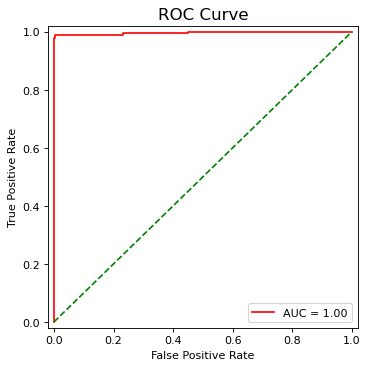

-----------"Testing Confusion Matrix"-------------
Predicted   0   1  All
True                  
0          68   3   71
1           0  42   42
All        68  45  113
-----------"Testing Avg Metrics"-------------
AVG Accuracy Score:  0.9660766961651918
AVG Precision:  0.9654195073786972
AVG Recall Rate:  0.9816901408450706
AVG F1-Score:  0.973215460816387
AVG AUC:  0.9923653029286832


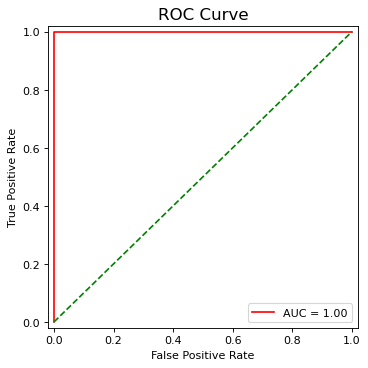

In [17]:
warnings.filterwarnings('ignore')

scaler = MinMaxScaler()
label_encoder = LabelEncoder().fit(['B', 'M'])

# Parameter values to be considered for cross-validation

parameters = {'C':np.logspace(-2,7,num=10)}

train_accuracy_list = list()
train_precision_list = list()
train_recall_list = list()
train_f1_score_list = list()
train_auc_list = list()

test_accuracy_list = list()
test_precision_list = list()
test_recall_list = list()
test_f1_score_list = list()
test_auc_list = list()

train_crosstab_list = dict()
test_crosstab_list = dict()

x_train_list = dict()
x_test_list = dict()

y_train_list = dict()
y_test_list = dict()

y_train_predict_list = dict()
y_test_predict_list = dict()

# Monte-Carlo Simulation

for i in (range(30)):
    # Split the dataframe
    
    x_train, x_test, y_train, y_test = train_test_split_by_class_and_ratio(df, 
                                                                           test_size=0.2,
                                                                           random_state=i, 
                                                                           pos_class='B', 
                                                                           neg_class='M')
    
    # Normalize the data
    
    x_train_std = scaler.fit_transform(x_train)
    x_test_std = scaler.transform(x_test)
    
    # Binarize the target column
    
    y_train = label_encoder.transform(y_train)
    y_test = label_encoder.transform(y_test)
    
    x_train_list[i] = x_train_std
    x_test_list[i] = x_test_std
    
    y_train_list[i] = y_train
    y_test_list[i] = y_test

    # Model
    
    linear_svc = LinearSVC(penalty='l1',dual=False,random_state=100)
    gridCV = GridSearchCV(linear_svc, parameters, cv=5, n_jobs=-1)
    gridCV.fit(x_train_std, y_train)

    best_clf = gridCV.best_estimator_
    
    y_train_predict = best_clf.predict(x_train_std)
    y_test_predict = best_clf.predict(x_test_std)

    y_train_predict_list[i] = y_train_predict
    y_test_predict_list[i] = y_test_predict

    # Metrics
    # accuracy, precision, recall, F1-score, and AUC
    
    train_crosstab = pd.crosstab(y_train, y_train_predict, rownames=['True'], 
                                colnames=['Predicted'], margins=True)
    train_crosstab_list[i] = train_crosstab
    test_crosstab = pd.crosstab(y_test, y_test_predict, rownames=['True'], 
                               colnames=['Predicted'], margins=True)
    test_crosstab_list[i] = test_crosstab

    train_accuracy_list.append(accuracy_score(y_train, y_train_predict))
    test_accuracy_list.append(accuracy_score(y_test, y_test_predict))
    
    train_precision, train_recall, train_f1_score, _ = score(y_train, y_train_predict, 
                                                         average='binary', pos_label=0)
    train_precision_list.append(train_precision)
    train_recall_list.append(train_recall)
    train_f1_score_list.append(train_f1_score)

    test_precision, test_recall, test_f1_score, _ = score(y_test, y_test_predict, 
                                                      average='binary', pos_label=0)
    test_precision_list.append(test_precision)
    test_recall_list.append(test_recall)
    test_f1_score_list.append(test_f1_score)
   
    y_score_train = best_clf.decision_function(x_train_std)
    fpr, tpr, threshold = roc_curve(y_train, y_score_train)
    trainAUC = auc(fpr, tpr)
    train_auc_list.append(trainAUC) 
    
    y_score_test = best_clf.decision_function(x_test_std)
    fpr, tpr, threshold = roc_curve(y_test, y_score_test)
    testAUC = auc(fpr, tpr)
    test_auc_list.append(testAUC)

# Train
# Report confusion matrix for any one run 
# Here we choose the run with the best precision

best_precision_index = np.argmax(train_precision_list)
print("-----------\"Training Confusion Matrix\"-------------")
print(train_crosstab_list[best_precision_index])

# Report average metrics over all runs

print("-----------\"Training Avg Metrics\"-------------")
print("AVG Accuracy Score: ", np.average(train_accuracy_list))
print("AVG Precision: ", np.average(train_precision_list))
print("AVG Recall Rate: ", np.average(train_recall_list))
print("AVG F1-Score: ", np.average(train_f1_score_list))
print("AVG AUC: ", np.average(train_auc_list))
supervised_train_df = pd.DataFrame(data={'Algorithm': ['Supervised Train']})
supervised_train_df['AVG Accuracy'] = np.average(train_accuracy_list)
supervised_train_df['AVG Precision'] = np.average(train_precision_list)
supervised_train_df['AVG Recall'] = np.average(train_recall_list)
supervised_train_df['AVG F Score'] = np.average(train_f1_score_list)
supervised_train_df['AVG AUC'] = np.average(train_auc_list)
final_metrics_df = pd.DataFrame().append(supervised_train_df)

# Plot ROC

plot_roc(x_train_list[best_precision_index], y_train_list[best_precision_index], best_clf)

# Test
# Report confusion matrix for any one run 
# Here we choose the run with the best precision

best_precision_index = np.argmax(test_precision_list)
print("-----------\"Testing Confusion Matrix\"-------------")
print(test_crosstab_list[best_precision_index])

# Report average metrics over all runs

print("-----------\"Testing Avg Metrics\"-------------")
print("AVG Accuracy Score: ", np.average(test_accuracy_list))
print("AVG Precision: ", np.average(test_precision_list))
print("AVG Recall Rate: ", np.average(test_recall_list))
print("AVG F1-Score: ", np.average(test_f1_score_list))
print("AVG AUC: ", np.average(test_auc_list))
supervised_test_df = pd.DataFrame(data={'Algorithm': ['Supervised Test']})
supervised_test_df['AVG Accuracy'] = np.average(test_accuracy_list)
supervised_test_df['AVG Precision'] = np.average(test_precision_list)
supervised_test_df['AVG Recall'] = np.average(test_recall_list)
supervised_test_df['AVG F Score'] = np.average(test_f1_score_list)
supervised_test_df['AVG AUC'] = np.average(test_auc_list)
final_metrics_df = final_metrics_df.append(supervised_test_df)

# Plot ROC

plot_roc(x_test_list[best_precision_index], y_test_list[best_precision_index], best_clf)

# ii. Semi-Supervised Learning/ Self-training: select 50% of the positive class along with 50% of the negative class in the training set as labeled data and the rest as unlabelled data. You can select them randomly.

# A. Train an L1-penalized SVM to classify the labeled data Use normalized data. Choose the penalty parameter using 5 fold cross validation.

In [18]:
# Split the dataframe

x_train, x_test, y_train, y_test = train_test_split_by_class_and_ratio(df, 
                                                                    test_size=0.2,
                                                                    random_state=100, 
                                                                    pos_class='B', 
                                                                    neg_class='M')
x_train_cols = x_train.columns
x_test_cols = x_test.columns
y_train_cols = y_train.columns
y_test_cols = y_test.columns

# Normalize the data

x_train_std = scaler.fit_transform(x_train)
x_test_std = scaler.transform(x_test)

x_train_std_df = pd.DataFrame(x_train_std,columns=x_train_cols)
x_test_std_df = pd.DataFrame(x_test_std,columns=x_test_cols)

# Binarize the target column

y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)

y_train_df = pd.DataFrame(y_train,columns=y_train_cols)
y_test_df = pd.DataFrame(y_test,columns=y_test_cols)

df_new = pd.concat([x_train_std_df,y_train_df],axis=1)

# Select 50% of the training set as labeled data and the rest as unlabeled data

x_labeled, x_unlabeled, y_labeled, y_unlabeled = train_test_split_by_class_and_ratio(df_new,
                                                                                test_size=0.5,
                                                                                random_state=100, 
                                                                                pos_class=0,
                                                                                neg_class=1)

# Parameter values to be considered for cross-validation

parameters = {'C':np.logspace(-2,7,num=10)}

# Model

linear_svc = LinearSVC(penalty='l1', dual=False, max_iter=5000, random_state=100)
gridCV = GridSearchCV(linear_svc, parameters, cv=5, n_jobs=-1)
gridCV.fit(x_labeled, y_labeled)

print("The best penalty parameter is: ", gridCV.best_params_)

The best penalty parameter is:  {'C': 1.0}


# B. Find the unlabeled data point that is the farthest to the decision boundary of the SVM. Let the SVM label it (ignore its true label), and add it to the labeled data, and retrain the SVM. Continue this process until all unlabeled data are used. Test the final SVM on the test data andthe average accuracy, precision, recall, F1-score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs.

In [19]:
def semi_supervised_learning_model(x_train, y_train, x_test, clf):
    
    x_test = np.array(x_test)
    x_test_shape = x_test.shape[0]
    
    y_train = np.array(y_train)
    
    for _ in range(x_test_shape):
        absolute_distances = np.absolute(best_clf.decision_function(x_test))
        farthest_distance_index = np.argmax(absolute_distances)
                
        farthest_data_point = np.array(x_test[farthest_distance_index]).reshape(1, 31)
        pred_result = clf.predict(farthest_data_point)

        x_test = np.delete(x_test, farthest_distance_index, axis=0)
        x_train = np.append(x_train, farthest_data_point, axis=0)         
        y_train = np.append(y_train, [pred_result], axis=0)

        clf.fit(x_train, y_train)

    return clf,x_train,y_train

-----------"Training Confusion Matrix"-------------
Predicted    0    1  All
True                    
0          294    0  294
1            0  162  162
All        294  162  456
-----------"Training Avg Metrics"-------------
AVG Accuracy Score:  0.9949561403508772
AVG Precision:  0.9931586845196239
AVG Recall Rate:  0.9989649317103193
AVG F1-Score:  0.9960492442266683
AVG AUC:  0.9990952491196963


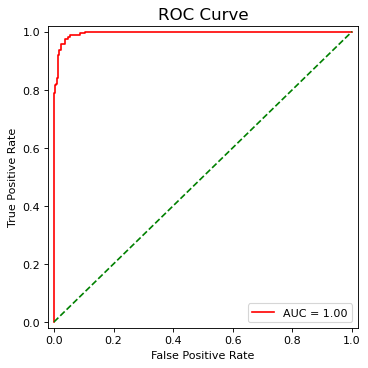

-----------"Testing Confusion Matrix"-------------
Predicted   0   1  All
True                  
0          71   0   71
1           1  41   42
All        72  41  113
-----------"Testing Avg Metrics"-------------
AVG Accuracy Score:  0.9663716814159292
AVG Precision:  0.9603938338639285
AVG Recall Rate:  0.9873239436619718
AVG F1-Score:  0.973501753170572
AVG AUC:  0.9951710261569416


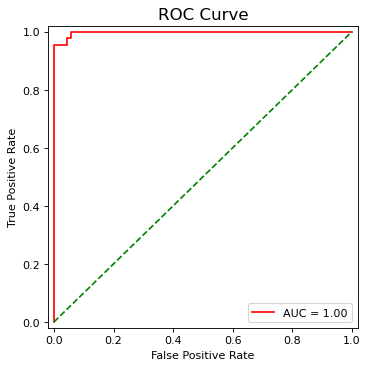

In [20]:
warnings.filterwarnings('ignore')

# Parameter values to be considered for cross-validation

parameters = {'C':np.logspace(-2,7,num=10)}

train_accuracy_list = list()
train_precision_list = list()
train_recall_list = list()
train_f1_score_list = list()
train_auc_list = list()

test_accuracy_list = list()
test_precision_list = list()
test_recall_list = list()
test_f1_score_list = list()
test_auc_list = list()

train_crosstab_list = dict()
test_crosstab_list = dict()

x_train_list = dict()

y_train_predict_list = dict()
y_test_predict_list = dict()
y_train_true_list = dict()

# Monte-Carlo Simulation

for i in (range(30)):
    # Split the dataframe
    
    x_labeled, x_unlabeled, y_labeled, y_unlabeled = train_test_split_by_class_and_ratio(df_new,
                                                                                test_size=0.5,
                                                                                random_state=i, 
                                                                                pos_class=0,
                                                                                neg_class=1)
    
    # Model
    
    linear_svc = LinearSVC(penalty='l1', dual=False, max_iter=5000, random_state=100)
    gridCV = GridSearchCV(linear_svc, parameters, cv=5, n_jobs=-1)
    gridCV.fit(x_labeled, y_labeled)

    best_clf = gridCV.best_estimator_

    best_clf,x_train_new,y_train_new = semi_supervised_learning_model(x_labeled.copy(), y_labeled.copy(), x_unlabeled.copy(), best_clf)
    
    x_train_list[i] = x_train_new

    y_train_predict = best_clf.predict(x_train_new)
    y_test_predict = best_clf.predict(x_test_std)

    y_train_predict_list[i] = y_train_predict
    y_test_predict_list[i] = y_test_predict
    y_train_true_list[i] = y_train_new

    # Metrics
    # accuracy, precision, recall, F1-score, and AUC
    
    train_crosstab = pd.crosstab(np.array(y_train_new).flatten(), y_train_predict, rownames=['True'], 
                                colnames=['Predicted'], margins=True)
    
    train_crosstab_list[i] = train_crosstab
    
    test_crosstab = pd.crosstab(y_test, y_test_predict, rownames=['True'], 
                               colnames=['Predicted'], margins=True)
    test_crosstab_list[i] = test_crosstab

    train_accuracy_list.append(accuracy_score(y_train_new, y_train_predict))
    test_accuracy_list.append(accuracy_score(y_test, y_test_predict))

    train_precision, train_recall, train_f1_score, _ = score(y_train_new, y_train_predict, 
                                                         average='binary', pos_label=0)
    train_precision_list.append(train_precision)
    train_recall_list.append(train_recall)
    train_f1_score_list.append(train_f1_score)

    test_precision, test_recall, test_f1_score, _ = score(y_test, y_test_predict, 
                                                      average='binary', pos_label=0)
    test_precision_list.append(test_precision)
    test_recall_list.append(test_recall)
    test_f1_score_list.append(test_f1_score)
    
    y_score_train = best_clf.decision_function(x_train_new)
    fpr, tpr, threshold = roc_curve(y_train_new, y_score_train)
    trainAUC = auc(fpr, tpr)
    train_auc_list.append(trainAUC) 
    
    y_score_test = best_clf.decision_function(x_test_std)
    fpr, tpr, threshold = roc_curve(y_test, y_score_test)
    testAUC = auc(fpr, tpr)
    test_auc_list.append(testAUC)
    
# Train
# Report confusion matrix for any one run 
# Here we choose the run with the best precision

best_precision_index = np.argmax(train_precision_list)
print("-----------\"Training Confusion Matrix\"-------------")
print(train_crosstab_list[best_precision_index])

# Report average metrics over all runs

print("-----------\"Training Avg Metrics\"-------------")
print("AVG Accuracy Score: ", np.average(train_accuracy_list))
print("AVG Precision: ", np.average(train_precision_list))
print("AVG Recall Rate: ", np.average(train_recall_list))
print("AVG F1-Score: ", np.average(train_f1_score_list))
print("AVG AUC: ", np.average(train_auc_list))
supervised_train_df = pd.DataFrame(data={'Algorithm': ['Semi-Supervised Train']})
supervised_train_df['AVG Accuracy'] = np.average(train_accuracy_list)
supervised_train_df['AVG Precision'] = np.average(train_precision_list)
supervised_train_df['AVG Recall'] = np.average(train_recall_list)
supervised_train_df['AVG F Score'] = np.average(train_f1_score_list)
supervised_train_df['AVG AUC'] = np.average(train_auc_list)
final_metrics_df = final_metrics_df.append(supervised_train_df)

# Plot ROC

plot_roc(x_train_list[best_precision_index], y_train_true_list[best_precision_index], best_clf)

# Test
# Report confusion matrix for any one run 
# Here we choose the run with the best precision

best_precision_index = np.argmax(test_precision_list)
print("-----------\"Testing Confusion Matrix\"-------------")
print(test_crosstab_list[best_precision_index])

# Report average metrics over all runs

print("-----------\"Testing Avg Metrics\"-------------")
print("AVG Accuracy Score: ", np.average(test_accuracy_list))
print("AVG Precision: ", np.average(test_precision_list))
print("AVG Recall Rate: ", np.average(test_recall_list))
print("AVG F1-Score: ", np.average(test_f1_score_list))
print("AVG AUC: ", np.average(test_auc_list))
supervised_test_df = pd.DataFrame(data={'Algorithm': ['Semi-Supervised Test']})
supervised_test_df['AVG Accuracy'] = np.average(test_accuracy_list)
supervised_test_df['AVG Precision'] = np.average(test_precision_list)
supervised_test_df['AVG Recall'] = np.average(test_recall_list)
supervised_test_df['AVG F Score'] = np.average(test_f1_score_list)
supervised_test_df['AVG AUC'] = np.average(test_auc_list)
final_metrics_df = final_metrics_df.append(supervised_test_df)

# Plot ROC

plot_roc(x_test_list[best_precision_index], y_test_list[best_precision_index], best_clf)

# iii. Unsupervised Learning: Run k-means algorithm on the whole training set. Ignore the labels of the data, and assume k = 2.

# A. Run the k-means algorithm multiple times. Make sure that you initialize the algoritm randomly. How do you make sure that the algorithm was not trapped in a local minimum?

In [21]:
for i in range(30):
    # Split the dataframe

    x_train, x_test, y_train, y_test = train_test_split_by_class_and_ratio(df, 
                                                                           test_size=0.2,
                                                                           random_state=i, 
                                                                           pos_class='B', 
                                                                           neg_class='M')
    
    # Normalize the data
    
    x_train_std = scaler.fit_transform(x_train)
    x_test_std = scaler.transform(x_test)
    
    # Binarize the target column
    
    y_train = label_encoder.transform(y_train)
    y_test = label_encoder.transform(y_test)
    
    # Model
    
    k_means = KMeans(n_clusters=2, init='random', n_init=10, random_state=100)
    cluster_labels = k_means.fit_predict(x_train_std)

We make sure that the algorithm is not trapped in a local minimum by setting the random seed and also trying to run the algorithm multiple times.

# B. Compute the centers of the two clusters and find the closest 30 data points to each center. Read the true labels of those 30 data points and take a majority poll within them. The majority poll becomes the label predicted by k-means for the members of each cluster. Then compare the labels provided by k-means with the true labels of the training data and report the average accuracy, precision, recall, F1-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs.

In [22]:
# Function to compute softmax values(probabilities) for each sets of scores in x

def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

# Function to plot the ROC for K-means and spectral clustering

def plot_roc_unsupervised(x, y, distances):
    y_proba = softmax(distances)
    fpr, tpr, threshold = roc_curve(y, y_proba)
    roc_auc = auc(fpr, tpr)
    
    figure(figsize=(5, 5), dpi=80)
    plt.title('ROC Curve', fontsize = 15)
    plt.plot(fpr, tpr, label = 'AUC = %0.2f' % roc_auc, color='red')
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--', color='green')
    plt.xlim([-0.02, 1.02])
    plt.ylim([-0.02, 1.02])
    plt.ylabel('True Positive Rate',fontsize = 10)
    plt.xlabel('False Positive Rate',fontsize = 10)
    plt.show()

-----------"Training Avg Metrics"-------------
AVG Accuracy Score:  0.9252192982456143
AVG Precision:  0.9135523534871254
AVG Recall Rate:  0.9729603729603731
AVG F1-Score:  0.9422596026612792
AVG AUC:  0.9089311668723432
-----------"Confusion Matrix of Any One Run"-------------
Predicted    0    1  All
True                    
0          275   11  286
1           26  144  170
All        301  155  456
-----------"ROC of Any One Run"-------------


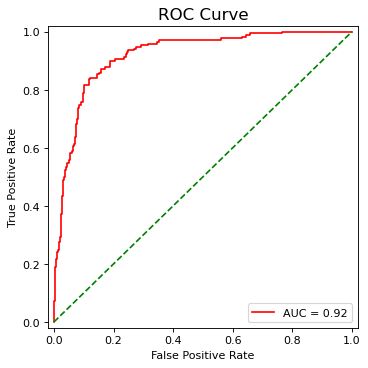

In [23]:
accuracy_list = list()
precision_list = list()
recall_list = list()
f1_score_list = list()
auc_list = list()

y_train_predict = None
y_train_true = None

# Monte-Carlo Simulation

for i in range(30):
    # Split the dataframe
    
    x_train, x_test, y_train, y_test = train_test_split_by_class_and_ratio(df, 
                                                                           test_size=0.2,
                                                                           random_state=i, 
                                                                           pos_class='B',
                                                                           neg_class='M')
    
    # Normalize the data
    
    x_train_std = scaler.fit_transform(x_train)
    x_test_std = scaler.transform(x_test)
    
    # Binarize the target column
    
    y_train = label_encoder.transform(y_train)
    y_test = label_encoder.transform(y_test)
    
    # Model
    
    k_means = KMeans(n_clusters=2, init='random', n_init=10, random_state=100)
    cluster_labels = k_means.fit_predict(x_train_std)
    
    # Find the closest 30 data points to each center
    
    pos_cluster_distance_index = np.argsort(cdist(x_train_std, k_means.cluster_centers_, 
                                      'euclidean')[:, 0], axis=0)[:30]
    neg_cluster_distance_index = np.argsort(cdist(x_train_std, k_means.cluster_centers_, 
                                      'euclidean')[:, 1], axis=0)[:30]

    y_train_pos_nearest_30 = y_train[pos_cluster_distance_index]
    y_train_neg_nearest_30 = y_train[neg_cluster_distance_index]
    
    pos_label = Counter(y_train_pos_nearest_30).most_common(1)[0][0]
    neg_label = Counter(y_train_neg_nearest_30).most_common(1)[0][0]
    
    labels_by_majority_polling = np.vectorize(lambda x: pos_label if x == 0 else neg_label)
    new_cluster_labels = labels_by_majority_polling(cluster_labels)
    
    y_train_predict = new_cluster_labels
    y_train_true = y_train
    
    # Metrics
    # accuracy, precision, recall, F1-score, and AUC
    
    accuracy_list.append(accuracy_score(y_train, y_train_predict))
    precision, recall, f1_score, _ = score(y_train, y_train_predict, average='binary', pos_label=0)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_score_list.append(f1_score)
    fpr, tpr, _ = roc_curve(y_train, y_train_predict)
    auc_list.append(auc(fpr, tpr))

# Train
# Report average metrics over all runs

print("-----------\"Training Avg Metrics\"-------------")
print("AVG Accuracy Score: ", np.average(accuracy_list))
print("AVG Precision: ", np.average(precision_list))
print("AVG Recall Rate: ", np.average(recall_list))
print("AVG F1-Score: ", np.average(f1_score_list))
print("AVG AUC: ", np.average(auc_list))
unsupervised_train_df = pd.DataFrame(data={'Algorithm': ['Unsupervised(K-means) Train']})
unsupervised_train_df['AVG Accuracy'] = np.average(accuracy_list)
unsupervised_train_df['AVG Precision'] = np.average(precision_list)
unsupervised_train_df['AVG Recall'] = np.average(recall_list)
unsupervised_train_df['AVG F Score'] = np.average(f1_score_list)
unsupervised_train_df['AVG AUC'] = np.average(auc_list)
final_metrics_df = final_metrics_df.append(unsupervised_train_df)

# Report confusion matrix for any one run 

print("-----------\"Confusion Matrix of Any One Run\"-------------")
print(pd.crosstab(y_train_true, y_train_predict, rownames=['True'], colnames=['Predicted'], margins=True))

# Plot ROC

print("-----------\"ROC of Any One Run\"-------------")
distances_train = cdist(x_train_std, k_means.cluster_centers_,'euclidean')[:, 0]
plot_roc_unsupervised(x_train_std, y_train, distances_train)

# C. Classify test data based on their proximity to the centers of the clusters. Report the average accuracy, precision, recall, F1-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs for the test data.

In [24]:
# Function to check the result 

def check_result(labels):
    majority_predicted_class = Counter(labels).most_common(1)[0][0]
    if majority_predicted_class != 0:
        flip = np.vectorize(lambda x: 1 if x == 0 else 0)
        return flip(labels).tolist()
    return labels

-----------"Testing Avg Metrics"-------------
AVG Accuracy Score:  0.9283185840707966
AVG Precision:  0.9182519607462734
AVG Recall Rate:  0.9737089201877933
AVG F1-Score:  0.9447691398176531
AVG AUC:  0.9126481108875475
-----------"Confusion Matrix of Any One Run"-------------
Predicted   0   1  All
True                  
0          69   2   71
1           6  36   42
All        75  38  113
-----------"ROC of Any One Run"-------------


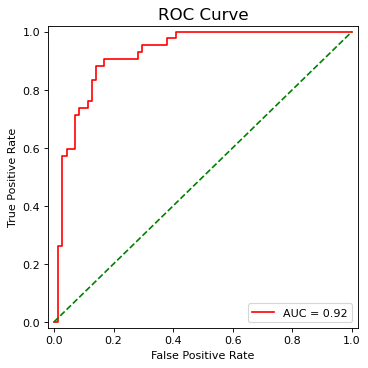

In [25]:
accuracy_list = list()
precision_list = list()
recall_list = list()
f1_score_list = list()
auc_list = list()

y_test_predict = list()
y_test_true = None

# Monte-Carlo Simulation

for i in range(30):
    # Split the dataframe
    
    x_train, x_test, y_train, y_test = train_test_split_by_class_and_ratio(df, 
                                                                           test_size=0.2,
                                                                           random_state=i, 
                                                                           pos_class='B',
                                                                           neg_class='M')
    
    # Normalize the data
    
    x_train_std = scaler.fit_transform(x_train)
    x_test_std = scaler.transform(x_test)
    
    # Binarize the target column
    
    y_train = label_encoder.transform(y_train)
    y_test = label_encoder.transform(y_test)
    
    # Model
    
    k_means = KMeans(n_clusters=2, init='random', n_init=10, random_state=100).fit(x_train_std)
    cluster_labels = k_means.predict(x_test_std)
    
    # Classify test data based on their proximity to the centers of the clusters
    
    pos_cluster_distances = cdist(x_test_std, k_means.cluster_centers_, 'euclidean')[:, 0]
    neg_cluster_distances = cdist(x_test_std, k_means.cluster_centers_, 'euclidean')[:, 1]
    
    y_test_predict.clear()
    
    for index, pred_label in enumerate(cluster_labels):
        if pred_label == 0:
            y_test_predict.append(0 if abs(pos_cluster_distances[index]) < abs(neg_cluster_distances[index]) else 1)
        else:
            y_test_predict.append(1 if abs(pos_cluster_distances[index]) > abs(neg_cluster_distances[index]) else 0)

    y_test_predict = check_result(y_test_predict)
    y_test_true = y_test
    
    # Metrics
    # accuracy, precision, recall, F1-score, and AUC
    
    accuracy_list.append(accuracy_score(y_test, y_test_predict))
    precision, recall, f1_score, _ = score(y_test, y_test_predict, average='binary', pos_label=0)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_score_list.append(f1_score)
    fpr, tpr, _ = roc_curve(y_test, y_test_predict)
    auc_list.append(auc(fpr, tpr))

# Test
# Report average metrics over all runs

print("-----------\"Testing Avg Metrics\"-------------")
print("AVG Accuracy Score: ", np.average(accuracy_list))
print("AVG Precision: ", np.average(precision_list))
print("AVG Recall Rate: ", np.average(recall_list))
print("AVG F1-Score: ", np.average(f1_score_list))
print("AVG AUC: ", np.average(auc_list))
unsupervised_test_df = pd.DataFrame(data={'Algorithm': ['Unsupervised(K-means) Test']})
unsupervised_test_df['AVG Accuracy'] = np.average(accuracy_list)
unsupervised_test_df['AVG Precision'] = np.average(precision_list)
unsupervised_test_df['AVG Recall'] = np.average(recall_list)
unsupervised_test_df['AVG F Score'] = np.average(f1_score_list)
unsupervised_test_df['AVG AUC'] = np.average(auc_list)
final_metrics_df = final_metrics_df.append(unsupervised_test_df)

# Report confusion matrix for any one run 

print("-----------\"Confusion Matrix of Any One Run\"-------------")
print(pd.crosstab(y_test_true, np.reshape(y_test_predict, (-1,)), rownames=['True'], colnames=['Predicted'], margins=True))

# Plot ROC

print("-----------\"ROC of Any One Run\"-------------")
distances_test = cdist(x_test_std, k_means.cluster_centers_,'euclidean')[:, 0]
plot_roc_unsupervised(x_test_std, y_test, distances_test)

# iv. Spectral Clustering: Repeat 1(b)iii using spectral clustering, which is clustering based on kernels.3 Research what spectral clustering is. Use RBF kernel with gamma=1 or  nd a gamma for which the two clutsres have the same balance as the one in original data set (if the positive class has p and the negative class has n samples, the two clusters must have p and n members). Do not label data based on their proximity to cluster center, because spectral clustering may give you non-convex clusters . Instead, use fit_predict method.

A.

In [26]:
for i in range(30):
    # Split the dataframe
    
    x_train, x_test, y_train, y_test = train_test_split_by_class_and_ratio(df, 
                                                                           test_size=0.2,
                                                                           random_state=i, 
                                                                           pos_class='B', 
                                                                           neg_class='M')
    
    # Normalize the data
    
    x_train_std = scaler.fit_transform(x_train)
    x_test_std = scaler.transform(x_test)
    
    # Binarize the target column
    
    y_train = label_encoder.transform(y_train)
    y_test = label_encoder.transform(y_test)
    
    # Model
    
    spectral_clf = SpectralClustering(n_clusters=2, assign_labels='kmeans', affinity="rbf", n_init=10, gamma=1e-3, random_state=100)
    cluster_labels = spectral_clf.fit_predict(x_train_std)

We make sure that the algorithm is not trapped in a local minimum by setting the random seed and also trying to run the algorithm multiple times.

B.

-----------"Training Avg Metrics"-------------
AVG Accuracy Score:  0.9238304093567253
AVG Precision:  0.9132741449215174
AVG Recall Rate:  0.970862470862471
AVG F1-Score:  0.9411385833680317
AVG AUC:  0.9077841766077059
-----------"Confusion Matrix of Any One Run"-------------
Predicted    0    1  All
True                    
0          274   12  286
1           26  144  170
All        300  156  456
-----------"ROC of Any One Run"-------------


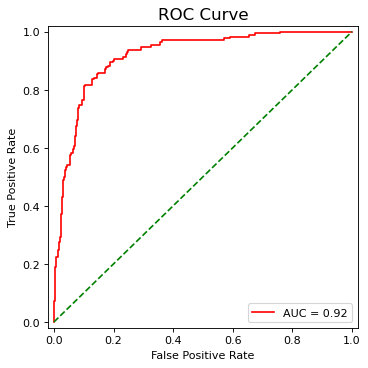

In [27]:
accuracy_list = list()
precision_list = list()
recall_list = list()
f1_score_list = list()
auc_list = list()

y_train_predict = None
y_train_true = None

# Monte-Carlo Simulation

for i in range(30):
    # Split the dataframe
    
    x_train, x_test, y_train, y_test = train_test_split_by_class_and_ratio(df, 
                                                                           test_size=0.2,
                                                                           random_state=i, 
                                                                           pos_class='B',
                                                                           neg_class='M')
    
    # Normalize the data
    
    x_train_std = scaler.fit_transform(x_train)
    x_test_std = scaler.transform(x_test)
    
    # Binarize the target column
    
    y_train = label_encoder.transform(y_train)
    y_test = label_encoder.transform(y_test)
    
    # Model
    
    spectral_clf = SpectralClustering(n_clusters=2, assign_labels='kmeans', affinity="rbf", n_init=10, gamma=1e-3, random_state=100)
    cluster_labels = spectral_clf.fit_predict(x_train_std)
    
    # Label based on the entire points in each cluster
    
    pos_cluster_distance_index = np.argwhere(cluster_labels == 0).reshape(-1, )
    neg_cluster_distance_index = np.argwhere(cluster_labels == 1).reshape(-1, )

    y_train_pos = y_train[pos_cluster_distance_index]
    y_train_neg = y_train[neg_cluster_distance_index]
    
    pos_label = Counter(y_train_pos).most_common(1)[0][0]
    neg_label = Counter(y_train_neg).most_common(1)[0][0]
    
    cluster_labels[pos_cluster_distance_index] = pos_label
    cluster_labels[neg_cluster_distance_index] = neg_label

    y_train_predict = cluster_labels
    y_train_true = y_train
    
    # Metrics
    # accuracy, precision, recall, F1-score, and AUC
    
    accuracy_list.append(accuracy_score(y_train_true, y_train_predict))
    precision, recall, f1_score, _ = score(y_train_true, y_train_predict, 
                                          average='binary', pos_label=0)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_score_list.append(f1_score)
    fpr, tpr, _ = roc_curve(y_train_true, y_train_predict)
    auc_list.append(auc(fpr, tpr))

# Train
# Report average metrics over all runs

print("-----------\"Training Avg Metrics\"-------------")
print("AVG Accuracy Score: ", np.average(accuracy_list))
print("AVG Precision: ", np.average(precision_list))
print("AVG Recall Rate: ", np.average(recall_list))
print("AVG F1-Score: ", np.average(f1_score_list))
print("AVG AUC: ", np.average(auc_list))
unsupervised_spectral_train_df = pd.DataFrame(data={'Algorithm': ['Unsupervised(Spectral Clustering) Train']})
unsupervised_spectral_train_df['AVG Accuracy'] = np.average(accuracy_list)
unsupervised_spectral_train_df['AVG Precision'] = np.average(precision_list)
unsupervised_spectral_train_df['AVG Recall'] = np.average(recall_list)
unsupervised_spectral_train_df['AVG F Score'] = np.average(f1_score_list)
unsupervised_spectral_train_df['AVG AUC'] = np.average(auc_list)
final_metrics_df = final_metrics_df.append(unsupervised_spectral_train_df)

# Report confusion matrix for any one run 

print("-----------\"Confusion Matrix of Any One Run\"-------------")
print(pd.crosstab(y_train_true, y_train_predict, rownames=['True'], colnames=['Predicted'], margins=True))

# Plot ROC

print("-----------\"ROC of Any One Run\"-------------")
distances_train=[]

for clus in [0,1]:
    distances_train.append(np.mean(cdist(x_train_std, x_train_std[cluster_labels==clus] ,'euclidean'),axis=1))

plot_roc_unsupervised(x_train_std, y_train, distances_train[0])

-----------"Testing Avg Metrics"-------------
AVG Accuracy Score:  0.9292035398230089
AVG Precision:  0.9190926137771495
AVG Recall Rate:  0.9741784037558686
AVG F1 -Score:  0.9455129699429202
AVG AUC:  0.9136765034652359
-----------"Confusion Matrix of Any One Run"-------------
Predicted   0   1  All
True                  
0          69   2   71
1           6  36   42
All        75  38  113
-----------"ROC of Any One Run"-------------


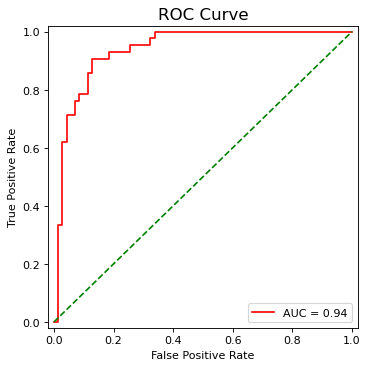

In [28]:
accuracy_list = list()
precision_list = list()
recall_list = list()
f1_score_list = list()
auc_list = list()

y_test_predict = None
y_test_true = None

# Monte-Carlo Simulation

for i in range(30):
    # Split the dataframe
    
    x_train, x_test, y_train, y_test = train_test_split_by_class_and_ratio(df, 
                                                                           test_size=0.2,
                                                                           random_state=i, 
                                                                           pos_class='B',
                                                                           neg_class='M')
    
    # Normalize the data
    
    x_train_std = scaler.fit_transform(x_train)
    x_test_std = scaler.transform(x_test)
    
    # Binarize the target column
    
    y_train = label_encoder.transform(y_train)
    y_test = label_encoder.transform(y_test)
    
    # Model
    
    spectral_clf = SpectralClustering(n_clusters=2, assign_labels='kmeans', affinity="rbf", n_init=10, gamma=1e-3, random_state=100)
    cluster_lbls = spectral_clf.fit_predict(x_train_std)
    
    # KNN used to fit on the training data and the above procured labels
    
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(x_train_std,cluster_lbls)
    
    cluster_labels = knn.predict(x_test_std)   
    
    # Label based on the entire points in each cluster
    
    pos_cluster_distance_index = np.argwhere(cluster_labels == 0).reshape(-1, )
    neg_cluster_distance_index = np.argwhere(cluster_labels == 1).reshape(-1, )

    y_test_pos = y_test[pos_cluster_distance_index]
    y_test_neg = y_test[neg_cluster_distance_index]
    
    pos_label = Counter(y_test_pos).most_common(1)[0][0]
    neg_label = Counter(y_test_neg).most_common(1)[0][0]
    
    cluster_labels[pos_cluster_distance_index] = pos_label
    cluster_labels[neg_cluster_distance_index] = neg_label

    y_test_predict = cluster_labels
    y_test_true = y_test
    
    # Metrics
    # accuracy, precision, recall, F1-score, and AUC
    
    accuracy_list.append(accuracy_score(y_test_true, y_test_predict))
    precision, recall, f1_score, _ = score(y_test_true, y_test_predict, 
                                          average='binary', pos_label=0)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_score_list.append(f1_score)
    fpr, tpr, _ = roc_curve(y_test_true, y_test_predict)
    auc_list.append(auc(fpr, tpr))

# Test
# Report average metrics over all runs

print("-----------\"Testing Avg Metrics\"-------------")
print("AVG Accuracy Score: ", np.average(accuracy_list))
print("AVG Precision: ", np.average(precision_list))
print("AVG Recall Rate: ", np.average(recall_list))
print("AVG F1 -Score: ", np.average(f1_score_list))
print("AVG AUC: ", np.average(auc_list))
unsupervised_spectral_test_df = pd.DataFrame(data={'Algorithm': ['Unsupervised(Spectral Clustering) Test']})
unsupervised_spectral_test_df['AVG Accuracy'] = np.average(accuracy_list)
unsupervised_spectral_test_df['AVG Precision'] = np.average(precision_list)
unsupervised_spectral_test_df['AVG Recall'] = np.average(recall_list)
unsupervised_spectral_test_df['AVG F Score'] = np.average(f1_score_list)
unsupervised_spectral_test_df['AVG AUC'] = np.average(auc_list)
final_metrics_df = final_metrics_df.append(unsupervised_spectral_test_df)

# Report confusion matrix for any one run 

print("-----------\"Confusion Matrix of Any One Run\"-------------")
print(pd.crosstab(y_test_true, y_test_predict, 
                  rownames=['True'], colnames=['Predicted'], margins=True))

# Plot ROC

print("-----------\"ROC of Any One Run\"-------------")
distances_test=[]

for clus in [0,1]:
    distances_test.append(np.mean(cdist(x_test_std, x_test_std[cluster_labels==clus] ,'euclidean'),axis=1))

plot_roc_unsupervised(x_test_std, y_test, distances_test[0])

# v. One can expect that supervised learning on the full data set works better than semi-supervised learning with half of the data set labeled.One can expect that unsupervised learning underperforms in such situations. Compare the results you obtained by those methods.

In [29]:
final_metrics_df

,Algorithm,AVG Accuracy,AVG Precision,AVG Recall,AVG F Score,AVG AUC
0,Supervised Train,0.985161,0.982076,0.994522,0.988251,0.997612
0,Supervised Test,0.966077,0.965420,0.981690,0.973215,0.992365
0,Semi-Supervised Train,0.994956,0.993159,0.998965,0.996049,0.999095
0,Semi-Supervised Test,0.966372,0.960394,0.987324,0.973502,0.995171
0,Unsupervised(K-means) Train,0.925219,0.913552,0.972960,0.942260,0.908931
0,Unsupervised(K-means) Test,0.928319,0.918252,0.973709,0.944769,0.912648
0,Unsupervised(Spectral Clustering) Train,0.923830,0.913274,0.970862,0.941139,0.907784
0,Unsupervised(Spectral Clustering) Test,0.929204,0.919093,0.974178,0.945513,0.913677


In a binary classification problem, we cannot just rely on a high accuracy score to determine how good our model is doing, especially when we have a skewed data set. But since our data is not skewed in this problem, average precision and avg recall could be a more reliable evaluation criterion, which basically describes how many patients our algorithm predicts correctly and out of all of the patients who have breast cancer, how many people were predicted correctly.
We can see from above that supervised learning has done a really good job. Semi-supervised learning has also made a great prediction. Both of them have very similar metrics.
As for unsupervised learning, the K-means algorithm has a high recall score but a relatively low precision implying that this algorithm tends to predict most people have breast cancer. Spectral clustering also beahves similarly in this case. Both of the unsupervised learning algorithms have very similar metrics.
Overall, we can observe that for this problem, supervised and semi-supervised learning algorithms perform better than unsupervised algorithms as is expected.

# 2. Active Learning Using Support Vector Machines

# (a) Download the banknote authentication Data Set from: https://archive.ics. uci.edu/ml/datasets/banknote+authentication. Choose 472 data points randomly as the test set, and the remaining 900 points as the training set. This is a binary classification problem.

In [30]:
# Read the input file into a dataframe

df_banknote = pd.read_csv("../data/data_banknote_authentication.txt", header = None)
df_banknote.columns = ['variance', 'skewness', 'curtosis', 'entropy', 'class']
df_banknote

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [31]:
# Function to split the dataframe according to mentioned specifications 

def train_test_split_by_exact_number(df, test_size, random_state):
    
    if random_state:
        df = df.sample(frac = 1,random_state=random_state)

    x_test = df.iloc[:test_size,0:4].reset_index()
    x_test.drop({'index'},axis=1,inplace=True)
    y_test = df.iloc[:test_size,-1].reset_index()
    y_test.drop({'index'},axis=1,inplace=True)
    
    x_train = df.iloc[test_size:,0:4].reset_index()
    x_train.drop({'index'},axis=1,inplace=True)
    y_train = df.iloc[test_size:,-1].reset_index()
    y_train.drop({'index'},axis=1,inplace=True)
    
    return x_train, x_test, y_train, y_test

In [32]:
# Call the function

x_train, x_test, y_train, y_test = train_test_split_by_exact_number(df_banknote, test_size=472, random_state=100)

In [33]:
x_train

,variance,skewness,curtosis,entropy
0,5.08600,3.27980,-1.27010,1.11890
1,4.19270,-3.26740,2.58390,0.21766
2,2.92330,6.04640,-0.11168,-0.58665
3,3.84170,10.02150,-4.26990,-4.91590
4,0.49665,5.52700,1.77850,-0.47156
...,...,...,...,...
895,0.60050,1.93270,-3.28880,-0.32415
896,2.54900,6.14990,-1.16050,-1.23710
897,-1.25280,10.20360,2.17870,-5.60380
898,1.13170,3.96470,3.39790,0.84351


In [34]:
y_train

,class
0,0
1,0
2,0
3,0
4,0
...,...
895,1
896,0
897,0
898,0


In [35]:
x_test

,variance,skewness,curtosis,entropy
0,-1.56210,-2.2121,4.25910,0.27972
1,2.55590,3.3605,2.03210,0.26809
2,-2.31470,3.6668,-0.69690,-1.24740
3,2.96950,5.6222,0.27561,-1.15560
4,0.86202,2.6963,4.29080,0.54739
...,...,...,...,...
467,-1.54490,-10.1498,9.61520,-1.23320
468,5.12130,8.5565,-3.39170,-1.54740
469,2.40080,9.3593,-3.35650,-3.35260
470,-2.45540,-9.0407,8.86200,-0.86983


In [36]:
y_test

,class
0,1
1,0
2,1
3,0
4,0
...,...
467,1
468,0
469,0
470,1


# (b) Repeat each of the following two procedures 50 times. You will have 50 errors for 90 SVMs per each procedure.

# i. Train a SVM with a pool of 10 randomly selected data points from the training set using linear kernel and L1 penalty. Select the penalty parameter using 5-fold cross validation. Repeat this process by adding 10 other randomly selected data points to the pool, until you use all the 900 points. Do NOT replace the samples back into the training set at each step. Calculate the test error for each SVM. You will have 90 SVMs that were trained using 10, 20, 30, ... , 900 data points and their 90 test errors. You have implemented passive learning.

In [37]:
# Function to check if all selected data points are from one class

def check_y(data):
    data_array = np.array(data).flatten()   
    result = all(x == data_array[0] for x in data_array)
    
    if result:
        return True
    else:
        return False

In [38]:
# Passive Learning

warnings.filterwarnings("ignore")

# Normalize the data

scaler = MinMaxScaler()
x_train_std = scaler.fit_transform(x_train)
x_test_std = scaler.transform(x_test)

# Model

linear_svc = LinearSVC(penalty='l1', dual=False, max_iter=5000, random_state=100)

# Parameter values to be considered for cross-validation

parameters = {'C':np.logspace(-2,7,num=10)}

passive_test_errors_list = list()

# Monte-Carlo Simulation

for i in range(50):
    # Split the dataframe
    
    x_train, x_test, y_train, y_test = train_test_split_by_exact_number(df_banknote, 
                                                                        test_size=472,
                                                                        random_state=i)
   
    data_len = len(x_train)    
    uniform_data_values = np.arange(0, data_len)
    
    x_train_pool = np.array([[]])
    y_train_pool = np.array([])
    
    test_error_list = list()
    
    for __ in range(90):
        indexes = random.sample(uniform_data_values.tolist(), 10)
        
        # If all selected data points are from one class, select another set of 10 data points randomly
        
        while check_y(y_train.iloc[indexes]) == True:
            indexes = random.sample(uniform_data_values.tolist(), 10)
        
        uniform_data_values = np.setdiff1d(uniform_data_values, np.array(indexes))
        
        # Add those 10 randomly selected data points to the pool
            
        x_train_pool = np.append(x_train_pool, x_train.iloc[indexes]).reshape(-1, 4)
        y_train_pool = np.append(y_train_pool, y_train.iloc[indexes]).reshape(-1, )

        gridCV = GridSearchCV(linear_svc, parameters, cv=5, n_jobs=-1, scoring='accuracy')
        gridCV.fit(x_train_pool, y_train_pool)
        
        best_clf = gridCV.best_estimator_
        
        test_error_list.append(1 - best_clf.score(x_test, y_test))

    passive_test_errors_list.append(test_error_list)
    
avg_passive_test_errors_list = np.array(passive_test_errors_list).mean(axis=0)

print("50 test errors for 90 SVMs per each procedure:")
print('\n')
print(avg_passive_test_errors_list)

50 test errors for 90 SVMs per each procedure:


[0.14711864 0.07487288 0.04262712 0.0359322  0.03076271 0.02639831
 0.02309322 0.02152542 0.01987288 0.01949153 0.01610169 0.0165678
 0.01682203 0.01639831 0.01652542 0.01665254 0.01665254 0.01682203
 0.01601695 0.01474576 0.01351695 0.01368644 0.0140678  0.01389831
 0.01351695 0.01355932 0.01347458 0.01262712 0.01279661 0.01241525
 0.01300847 0.01275424 0.01262712 0.01288136 0.0125     0.01279661
 0.01211864 0.01182203 0.01186441 0.01173729 0.01177966 0.01131356
 0.01076271 0.01173729 0.01211864 0.01216102 0.01194915 0.01211864
 0.01110169 0.01084746 0.01084746 0.01105932 0.01076271 0.01059322
 0.01063559 0.01063559 0.01118644 0.01080508 0.01055085 0.01076271
 0.01038136 0.01050847 0.01055085 0.01055085 0.01050847 0.01029661
 0.01080508 0.01088983 0.0109322  0.01055085 0.01063559 0.01122881
 0.01072034 0.01084746 0.01080508 0.0109322  0.01038136 0.01067797
 0.01055085 0.01072034 0.01059322 0.01033898 0.0104661  0.01055085
 0.01059322 0.

# ii. Train a SVM with a pool of 10 randomly selected data points from the training set using linear kernel and L1 penalty. Select the parameters of the SVM with 5-fold cross validation. Choose the 10 closest data points in the training set to the hyperplane of the SVM6 and add them to the pool. Do not replace the samples back into the training set. Train a new SVM using the pool. Repeat this process until all training data is used. You will have 90 SVMs that were trained using 10, 20, 30,..., 900 data points and their 90 test errors. You have implemented active learning.

In [39]:
# Active Learning

warnings.filterwarnings("ignore")

# Normalize the data

x_train_std = scaler.fit_transform(x_train)
x_test_std = scaler.transform(x_test)

# Model

linear_svc = LinearSVC(penalty='l1', dual=False, max_iter=5000, random_state=100)

# Parameter values to be considered for cross-validation

parameters = {'C':np.logspace(-2,7,num=10)}

active_test_errors_list = list()

# Monte-Carlo Simulation

for i in range(50):
    # Split the dataframe
    
    x_train, x_test, y_train, y_test = train_test_split_by_exact_number(df_banknote, 
                                                                        test_size=472,
                                                                        random_state=i)
    
    data_len = len(x_train)
    uniform_data_values = np.arange(0, data_len)
    
    x_train_pool = np.array([[]])
    y_train_pool = np.array([])
    
    test_error_list = list()

    indexes = random.sample(uniform_data_values.tolist(), 10)
    
    # If all selected data points are from one class, select another set of 10 data points randomly
    
    while check_y(y_train.iloc[indexes]) == True:
        indexes = random.sample(uniform_data_values.tolist(), 10)
        
    uniform_data_values = np.setdiff1d(uniform_data_values, np.array(indexes))
    
    x_train_pool = np.append(x_train_pool, x_train.iloc[indexes]).reshape(-1, 4)
    y_train_pool = np.append(y_train_pool, y_train.iloc[indexes]).reshape(-1, )

    gridCV = GridSearchCV(linear_svc, parameters, cv=5, n_jobs=-1, scoring='accuracy')
    gridCV.fit(x_train_pool, y_train_pool)
        
    best_clf = gridCV.best_estimator_
        
    test_error_list.append(1 - best_clf.score(x_test, y_test))

    for __ in range(89):
        # Choose the 10 closest data points in the training set to the hyperplane of the SVM

        rem_data = x_train.iloc[uniform_data_values]
        distances = best_clf.decision_function(rem_data).reshape(-1, 1)
        rem_data = np.hstack((rem_data, abs(distances)))
        closest_indexes = rem_data[:, 4].argsort()[:10]
        first_closest_ten_x_points = x_train.iloc[closest_indexes]
        first_closest_ten_y_points = y_train.iloc[closest_indexes]
        
        uniform_data_values = np.setdiff1d(uniform_data_values, np.array(closest_indexes))
        
        x_train_pool = np.append(x_train_pool, first_closest_ten_x_points).reshape(-1, 4)
        y_train_pool = np.append(y_train_pool, first_closest_ten_y_points).reshape(-1, )

        gridCV = GridSearchCV(linear_svc, parameters, cv=5, n_jobs=-1, scoring='accuracy')
        gridCV.fit(x_train_pool, y_train_pool)
        
        best_clf = gridCV.best_estimator_
        
        test_error_list.append(1 - best_clf.score(x_test, y_test))

    active_test_errors_list.append(test_error_list)
    
avg_active_test_errors_list = np.array(active_test_errors_list).mean(axis=0)

print("50 test errors for 90 SVMs per each procedure:")
print('\n')
print(avg_active_test_errors_list)

50 test errors for 90 SVMs per each procedure:


[0.11533898 0.06461864 0.04029661 0.02809322 0.02584746 0.02470339
 0.02144068 0.02131356 0.02033898 0.01940678 0.0190678  0.01881356
 0.01898305 0.01762712 0.01677966 0.01707627 0.01720339 0.01699153
 0.01720339 0.01673729 0.0154661  0.01474576 0.01516949 0.01550847
 0.01563559 0.01470339 0.01474576 0.01444915 0.01461864 0.01491525
 0.01474576 0.01504237 0.01457627 0.01483051 0.01415254 0.01427966
 0.01364407 0.01398305 0.01360169 0.01347458 0.01347458 0.0134322
 0.01313559 0.01275424 0.01258475 0.0125     0.01275424 0.01279661
 0.01317797 0.0129661  0.01305085 0.01313559 0.01258475 0.01283898
 0.0129661  0.01292373 0.0125     0.01245763 0.01279661 0.01266949
 0.01258475 0.0125     0.01262712 0.0125     0.01241525 0.01288136
 0.01275424 0.01300847 0.01309322 0.0129661  0.01305085 0.01317797
 0.01338983 0.0129661  0.0134322  0.01330508 0.01317797 0.01300847
 0.01300847 0.01292373 0.01292373 0.01300847 0.01283898 0.0125
 0.0120339  0.0122

# (c) Average the 50 test errors for each of the incrementally trained 90 SVMs in 2(b)i and 2(b)ii. By doing so, you are performing a Monte Carlo simulation. Plot average test error versus number of training instances for both active and passive learners on the same figure and report your conclusions. Here, you are actually obtaining a learning curve by Monte-Carlo simulation.

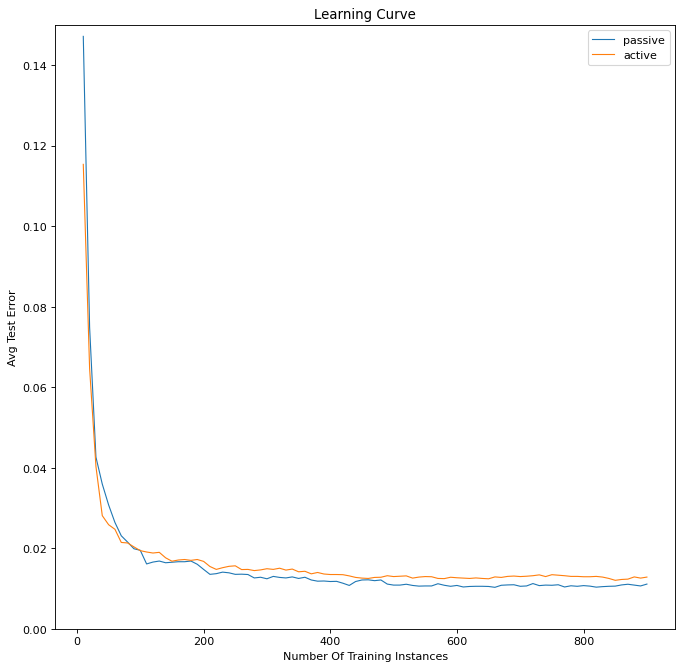

In [40]:
# Plot the learning curve

figure(figsize=(10, 10), dpi=80)
plt.plot(np.arange(10, 901, 10), avg_passive_test_errors_list, marker='', linewidth=1, label="passive")
plt.plot(np.arange(10, 901, 10), avg_active_test_errors_list, marker='', linewidth=1, label="active")
plt.xlabel("Number Of Training Instances")
plt.ylabel("Avg Test Error")
plt.ylim([0, 0.15])
plt.title("Learning Curve")
plt.legend()
plt.show()

In this case, for both passive and active learning, the average test error drops rapidly from the beginning and then becomes constant at some point as the number of training instances increases. Also the slope of active learning is smoother than passive learning. We expect that active learning outputs a lower test error but passive learning turns out to be better in this case. 
It has been reported that active learning infact would have a measurable improvement(i.e. a lower test error) over passive learning when we work on a multi-class problem but in a binary classification problem, it won't make much difference.